# Load Dataset

In [1]:
import pandas as pd
import numpy as np
loan= pd.read_csv("loan/loan_table.csv")
borrower= pd.read_csv("loan/borrower_table.csv")

In [2]:
print("Loan data has {} rows and {} columns".format(loan.shape[0],loan.shape[1]))
loan.head()

Loan data has 101100 rows and 5 columns


,loan_id,loan_purpose,date,loan_granted,loan_repaid
0,19454,investment,2012-03-15,0,NaN
1,496811,investment,2012-01-17,0,NaN
2,929493,other,2012-02-09,0,NaN
3,580653,other,2012-06-27,1,1.0
4,172419,business,2012-05-21,1,0.0


In [3]:
loan.loan_id.nunique()

101100

<b>All unique loan_id's meaning all 101100 are disctinct loans and doesn't require any kind of aggregation</b>

In [4]:
print("Borrower data has {} rows and {} columns".format(borrower.shape[0],borrower.shape[1]))
borrower.head()

Borrower data has 101100 rows and 12 columns


,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1


In [5]:
borrower.loan_id.nunique()

101100

<b>All unique loan_id's meaning all 101100 are disctinct loans and doesn't require any kind of aggregation</b>

<b>Joining the loan and borrower dataset using common column `loan_id` </b>

In [6]:
final=pd.merge(loan, borrower, on="loan_id")
print("Final data has {} rows and {} columns".format(final.shape[0],final.shape[1]))
final.head()

Final data has 101100 rows and 16 columns


,loan_id,loan_purpose,date,loan_granted,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,19454,investment,2012-03-15,0,NaN,1,NaN,NaN,8600,0.79,1491,6285,1,45200,42,7
1,496811,investment,2012-01-17,0,NaN,1,NaN,NaN,5300,0.52,141,5793,0,0,42,5
2,929493,other,2012-02-09,0,NaN,1,NaN,NaN,0,NaN,660,3232,1,26500,60,4
3,580653,other,2012-06-27,1,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
4,172419,business,2012-05-21,1,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4


<b> Final dataset also has the same number of rows </b>

# Bank Model Profitability

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

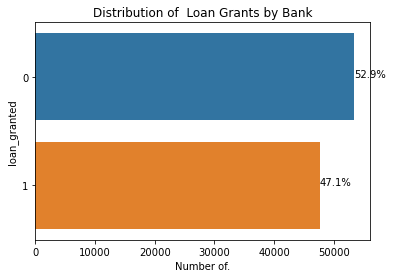

In [8]:
ax = sns.countplot(y="loan_granted", data=final)
plt.title('Distribution of  Loan Grants by Bank')
plt.xlabel('Number of.')

total = len(final)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

<b> Bank has granted loans to 47.1% of the total applicants</b>

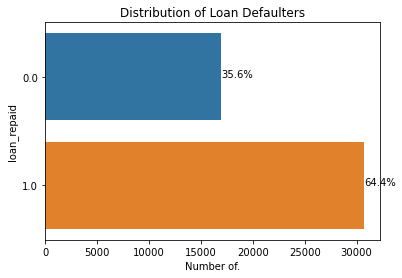

In [9]:
ax = sns.countplot(y="loan_repaid", data=final)
plt.title('Distribution of Loan Defaulters')
plt.xlabel('Number of.')

total = len(final[final.loan_granted==1])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

<b> Out of the applicants who wre granted loan, 35.6% defaulted the loan </b>

<b> Bank model accuracy= 64.4% </b>

In [10]:
def sums(a,b):
    if a==0:
        return 0
    else:
        if b==0:
            return -1
        else:
            return 1

In [11]:
loan['sum'] = loan.apply(lambda x: sums(x.loan_granted, x.loan_repaid), axis=1)
loan['sum'].value_counts()


 0    53446
 1    30706
-1    16948
Name: sum, dtype: int64

In [12]:
sum(loan['sum'])

13758

<b> Bank made a profit of 13,758 out of a total earning potential of 1,01,100 (if no defaulters applied) </b>

# Refined Model

In [13]:
final.dtypes

loan_id                                              int64
loan_purpose                                        object
date                                                object
loan_granted                                         int64
loan_repaid                                        float64
is_first_loan                                        int64
fully_repaid_previous_loans                        float64
currently_repaying_other_loans                     float64
total_credit_card_limit                              int64
avg_percentage_credit_card_limit_used_last_year    float64
saving_amount                                        int64
checking_amount                                      int64
is_employed                                          int64
yearly_salary                                        int64
age                                                  int64
dependent_number                                     int64
dtype: object

<b> Converting object type columns to numeric </b>

In [14]:
final['loan_purpose']= final['loan_purpose'].astype('category')
final['purpose'] = final['loan_purpose'].cat.codes
final['day']= final.apply(lambda x: int(x.date.split('-')[-1]), axis=1)
final['month']= final.apply(lambda x: int(x.date.split('-')[1]), axis=1)
final['year']= final.apply(lambda x: int(x.date.split('-')[0]), axis=1)

In [15]:
final['year'].nunique()

1

<b> Dropping year column as it is common for all data points </b>

In [16]:
final.drop(columns=['year'], inplace=True)

<b> Pearson Correlation </b>

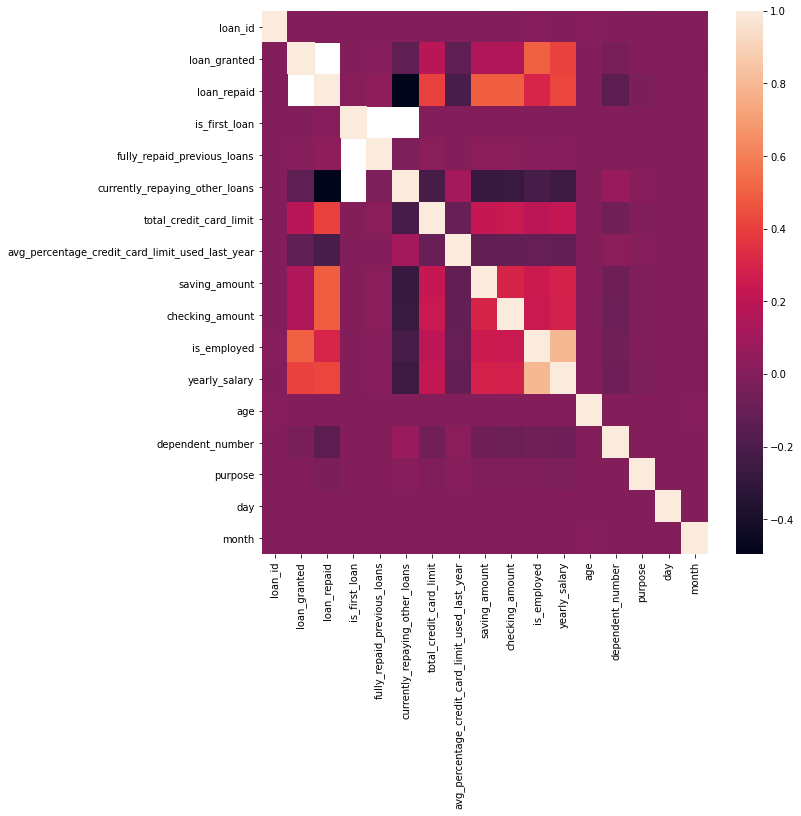

In [17]:
fig, ax = plt.subplots(figsize=(10,10)) 
pearsoncorr = final.corr(method='pearson')
sns.heatmap(pearsoncorr, 
        xticklabels=pearsoncorr.columns,
        yticklabels=pearsoncorr.columns)

<b> Dealing with Null Data Points </b>

In [18]:
final.isna().sum()

loan_id                                                0
loan_purpose                                           0
date                                                   0
loan_granted                                           0
loan_repaid                                        53446
is_first_loan                                          0
fully_repaid_previous_loans                        54947
currently_repaying_other_loans                     54947
total_credit_card_limit                                0
avg_percentage_credit_card_limit_used_last_year     6972
saving_amount                                          0
checking_amount                                        0
is_employed                                            0
yearly_salary                                          0
age                                                    0
dependent_number                                       0
purpose                                                0
day                            

In [19]:
final['currently_repaying_other_loans'].fillna(value=0, inplace=True)
final['fully_repaid_previous_loans'].fillna(value=1.0, inplace=True)

## Baseline Model: Logistic Regression

<b> We will only train/test on data points who were `granted loans` by the bank. As only those have `loan_repaid` column. This is the Supervised Approach for solving the classification problem </b> 

In [20]:
granted_with_no_na= final[final.loan_granted==1].dropna()
granted_with_no_na.isna().sum()

loan_id                                            0
loan_purpose                                       0
date                                               0
loan_granted                                       0
loan_repaid                                        0
is_first_loan                                      0
fully_repaid_previous_loans                        0
currently_repaying_other_loans                     0
total_credit_card_limit                            0
avg_percentage_credit_card_limit_used_last_year    0
saving_amount                                      0
checking_amount                                    0
is_employed                                        0
yearly_salary                                      0
age                                                0
dependent_number                                   0
purpose                                            0
day                                                0
month                                         

<b> Using Train-Test Split from the dataset. To train the model on training set and measure accuracy of the model on the test set. The split is 30% and uses stratification so that the test and train set has same proportions of classes (defaulters and non defaulters) </b>

<b> Also using One-Hot-Encoding to deal with categorical variables and Min-Max Scaling to deal with continous variables. These are used to give better convergence of the features and helps in improving feature importance. </b>

In [21]:

features= ['is_first_loan','fully_repaid_previous_loans','currently_repaying_other_loans','purpose','is_employed','total_credit_card_limit','avg_percentage_credit_card_limit_used_last_year','saving_amount','checking_amount','yearly_salary','age','dependent_number']
X= granted_with_no_na[features]
y= granted_with_no_na[['loan_repaid']]


from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

num_cols = features[5:]
cat_cols = features[:5]

# Build the column transformer and transform the dataframe
col_trans = ColumnTransformer([
    ('num', MinMaxScaler(), num_cols),
    ('cat', OneHotEncoder(drop='if_binary'), cat_cols)
])
granted_transformed = col_trans.fit_transform(granted_with_no_na)

X= granted_transformed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                            stratify=y, random_state=10)

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=10).fit(X_train, y_train.values.ravel())

y_pred=lr.predict(X_test)

In [23]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.9257861635220126
0.9032511050905462
0.8942808550143525


<b> For performance metrics, Used F1_Score and ROC AUC Score alongwith Accuracy as these are more important when dealing with classification of imbalanced classes </b>

<b> The ROC Accuracy is around 89% which is better than the bank model but can be improved further</b>

<b> CONFUSION MATRIX </b>

[[4205  656]
 [ 701 8464]]


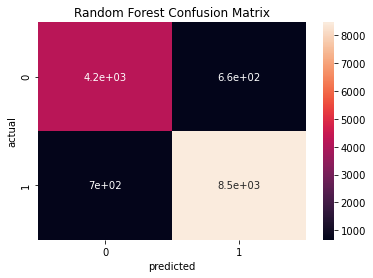

<Figure size 720x432 with 0 Axes>

In [24]:
from sklearn.metrics import confusion_matrix
ax= plt.subplot()
cm= confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot= True, ax= ax);

plt.figure(figsize=(10,6))
ax.set_xlabel("predicted"); ax.set_ylabel("actual");
ax.set_title("Random Forest Confusion Matrix");

<b> This is an important metrics to understand how model is performing on both the classes. The most important parameter for us is top right value which `656`. This is the number of applicants who our model classified as Non Defaulters but actually Defaulted the loan. In the following model we will work on decreasing this number and in-turn increasing accuracy. </b>

<b> Understanding Feature Importance </b>

total_credit_card_limit ---------------------------> Score: 6.57177
avg_percentage_credit_card_limit_used_last_year ---> Score: -2.67786
saving_amount -------------------------------------> Score: 14.72743
checking_amount -----------------------------------> Score: 10.79222
yearly_salary -------------------------------------> Score: 6.37882
age -----------------------------------------------> Score: -0.10367
dependent_number ----------------------------------> Score: -0.81821
is_first_loan -------------------------------------> Score: -0.72283
fully_repaid_previous_loans -----------------------> Score: 0.22726
currently_repaying_other_loans --------------------> Score: -2.13263
purpose_business ----------------------------------> Score: 0.43486
purpose_emergency ---------------------------------> Score: -0.55732
purpose_home --------------------------------------> Score: 0.14686
purpose_invest ------------------------------------> Score: 0.29050
purpose_others -------------------------

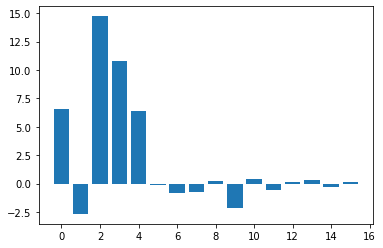

In [25]:
importance = lr.coef_[0]
features=['total_credit_card_limit','avg_percentage_credit_card_limit_used_last_year','saving_amount','checking_amount','yearly_salary','age','dependent_number','is_first_loan','fully_repaid_previous_loans','currently_repaying_other_loans','purpose_business','purpose_emergency','purpose_home','purpose_invest','purpose_others','is_employed']
# summarize feature importance
for i,v in enumerate(importance):
    print('%0s %s Score: %.5f' % (features[i],'-'*(50-len(features[i]))+'>',v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

<b> As expected from Correaltion plot features like `saving amt`,`checking amt`, `yearly salary` and `credit card limit` have high importance but we also see two other kinds of features. One, are the ones with decent importance and can be further imroved like `avg. credit limit used` and `currently repaying loans`  </b>

## Feature Engineering

<b> Missing Data points in avg credit limit used were earlier dropped but this seem to have cause an impact on the feature importance. Lets take a deeper look in the features and engineer alternate ways </b>

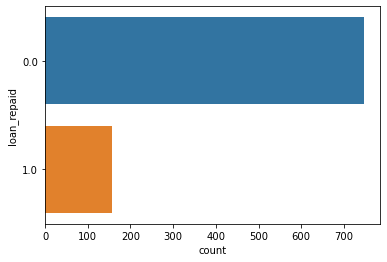

In [26]:
sns.countplot(y= "loan_repaid", data= final.loc[final['avg_percentage_credit_card_limit_used_last_year'].isna()==True])
plt.show()

<b> Voila! The ones who had avg. credit used as None are more prone to defaulting loans as compared to others </b>

<b> Creating another feature as `cred` which is a categorical variable with value 0 for those who don't have credit cards </b>

In [27]:
final['cred']=1
final.loc[final['avg_percentage_credit_card_limit_used_last_year'].isna()==True,'cred']=0

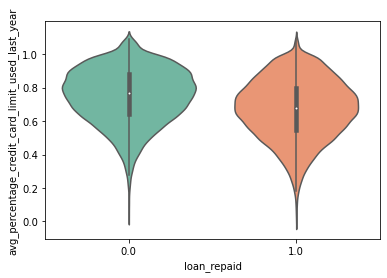

In [28]:
sns.violinplot(x='loan_repaid', y='avg_percentage_credit_card_limit_used_last_year', data=final, palette = "Set2")

<b> The general trend suggest that user with high usage of credit cards tend to default more. This is an important metric to be considered while replacing NaN values of this column. Cannot be replaced by 0 as it will add confusion to the model. Beacuse there is no other parameter that has a direct dependency on Avg. Use we are replacing this varibale with mean values.</b>

In [29]:
## no good correlation of avg with any other param

final['avg_percentage_credit_card_limit_used_last_year'].fillna(final['avg_percentage_credit_card_limit_used_last_year'].mean(),inplace=True)

<b> Purpose is a feature which had low corelation in the Pearson Map but individual purpose classes had good importance in baseline model. Lets explore this feature </b>

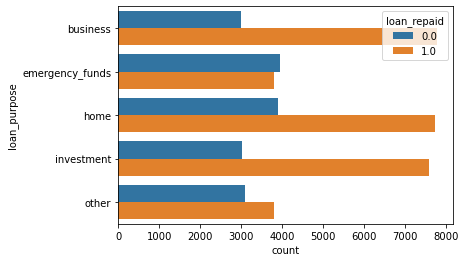

In [30]:
sns.countplot(y= "loan_purpose", hue= "loan_repaid", data= final)
plt.show()

<b> We find that people using loan for emergency purpose tend to default loan more than other puposes. </b>

In [31]:
final['is_emergency']=0
final.loc[final['loan_purpose']=='emergency_funds','is_emergency']=1

<b> `IS_EMPLOYED` is a feature with less than avg. importance in baseline model but seem to corelated with target variable </b>

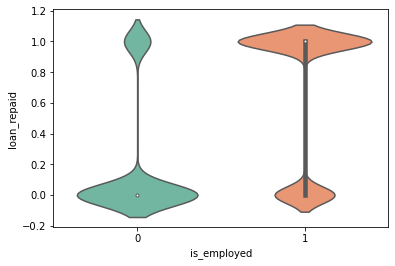

In [32]:
sns.violinplot(x='is_employed', y='loan_repaid', data=final, palette = "Set2")

<b> The distribution plot clearly states that `is_employed` has considerable amount of impact on loan default class. </b>

<b> Higher the dependent number greater the chances of deafaulting vice-versa </b>

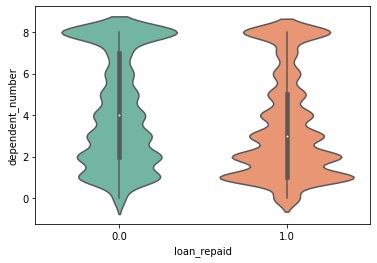

In [33]:
sns.violinplot(x='loan_repaid', y='dependent_number', data=final, palette = "Set2")

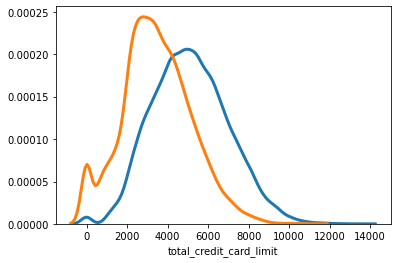

In [34]:
sns.distplot(final[final['loan_repaid']==1]['total_credit_card_limit'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3})
sns.distplot(final[final['loan_repaid']==0]['total_credit_card_limit'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3})

<b> While `fully repaid loans` doesn't have any correlation with target but  has a good correlation with an important feature `yearly salary` and can be used in the final model. </b> 

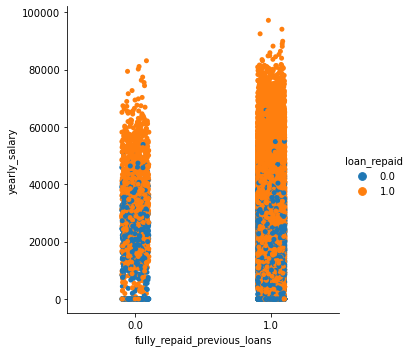

In [35]:
sns.catplot(x="fully_repaid_previous_loans", y="yearly_salary",hue="loan_repaid" ,data=final[final.loan_granted==1])

<b> As seen above non-defualters tend to have repaid previous loans and have higher yearly salary </b>

<b> Discarded features </b>

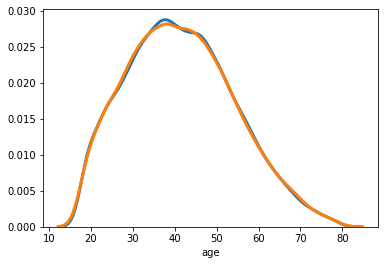

In [36]:
sns.distplot(final[final['loan_repaid']==1]['age'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3})
sns.distplot(final[final['loan_repaid']==0]['age'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3})

<BarContainer object of 18 artists>

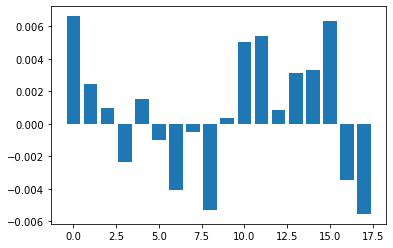

In [37]:
agecorr=final.loc[:, final.columns != 'age'].corrwith(final['age'],method='pearson')
plt.bar([x for x in range(len(agecorr))], agecorr)

<b> The `age` distribution for both defaulter and non defaulters is almost same and also age doesn't seem to have any correlation with any other feature. </b>

<b> Similar Results for `is_first_loan` </b>

In [38]:
firstloancorr=final.loc[:, final.columns != 'is_first_loan'].corrwith(final['is_first_loan'],method='pearson')
firstloancorr

loan_id                                            0.003189
loan_granted                                      -0.004398
loan_repaid                                        0.012824
fully_repaid_previous_loans                        0.239524
currently_repaying_other_loans                    -0.487355
total_credit_card_limit                            0.000679
avg_percentage_credit_card_limit_used_last_year   -0.000753
saving_amount                                      0.005650
checking_amount                                    0.005114
is_employed                                       -0.000971
yearly_salary                                     -0.001674
age                                               -0.002353
dependent_number                                   0.000887
purpose                                           -0.000080
day                                               -0.002776
month                                              0.000045
cred                                    

## Final Featureset and Baseline Retraining

In [39]:
features= ['currently_repaying_other_loans',
           'is_employed',
           'is_emergency',
           'fully_repaid_previous_loans',
           'cred',
           'avg_percentage_credit_card_limit_used_last_year',
           'total_credit_card_limit',
             'saving_amount',
           'checking_amount',
             'yearly_salary',
           'age',
           'dependent_number']

In [40]:
granted= final[final['loan_granted']==1]
not_granted= final[final['loan_granted']==0]


# Define the numerical and categorical columns
num_cols = features[4:]
cat_cols = features[:4]

# Build the column transformer and transform the dataframe
col_trans = ColumnTransformer([
    ('num', MinMaxScaler(), num_cols),
    ('cat', OneHotEncoder(drop='if_binary'), cat_cols)
])
granted_transformed = col_trans.fit_transform(granted)

X= granted_transformed
y= granted[['loan_repaid']]

# Stratified split of the train and test set with train-test ratio of 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                            stratify=y, random_state=10)


In [41]:
lr = LogisticRegression(random_state=10).fit(X_train, y_train.values.ravel())

y_pred=lr.predict(X_test)


from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))


0.9224058018430668
0.9004686297824719
0.8932934084950116


<b> The Accuracy doesn't seem to change much for LR. Will try other models. </b>

## Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

# See the inital model performance
clf = RandomForestClassifier(random_state=10,n_estimators= 100)

clf.fit(X_train, y_train.values.ravel())
y_pred=clf.predict(X_test)

In [43]:
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.9391780821917809
0.9223613345457089
0.9191364476500448


[[4617  468]
 [ 642 8570]]


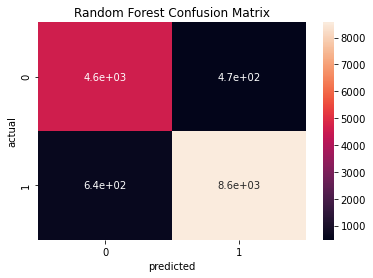

<Figure size 720x432 with 0 Axes>

In [44]:
ax= plt.subplot()
cm= confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot= True, ax= ax);

plt.figure(figsize=(10,6))
ax.set_xlabel("predicted"); ax.set_ylabel("actual");
ax.set_title("Random Forest Confusion Matrix");

## Gradient Boosting

In [45]:
from sklearn.ensemble import  GradientBoostingClassifier

In [46]:
gbr= GradientBoostingClassifier(learning_rate= 0.1, random_state= 0)
gbr.fit(X_train, y_train.values.ravel())
y_pred=gbr.predict(X_test)
print(f1_score(y_pred, y_test))
print(accuracy_score(y_pred,y_test))
print(roc_auc_score(y_pred,y_test))

0.9402477798487009
0.9237602294187591
0.9144856469616603


[[4631  454]
 [ 636 8576]]


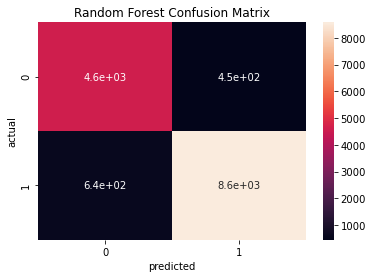

<Figure size 720x432 with 0 Axes>

In [47]:
ax= plt.subplot()
cm= confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot= True, ax= ax);

plt.figure(figsize=(10,6))
ax.set_xlabel("predicted"); ax.set_ylabel("actual");
ax.set_title("Random Forest Confusion Matrix");

## XG Boost With Repeated Stratefied K Fold Validation

In [48]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
model = XGBClassifier(max_depth=3,eta=0.1, n_estimators=150)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
X= granted_transformed
y= granted[['loan_repaid']]
#n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
#print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
model.fit(X_train, y_train.values.ravel())
y_pred=model.predict(X_test)
print(f1_score(y_pred, y_test))
print(accuracy_score(y_pred,y_test))
print(roc_auc_score(y_pred,y_test))


0.9409827065605271
0.9248094005735469
0.9153177795203303


[[4652  433]
 [ 642 8570]]


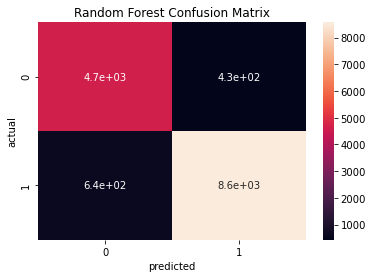

<Figure size 720x432 with 0 Axes>

In [49]:
ax= plt.subplot()
cm= confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot= True, ax= ax);

plt.figure(figsize=(10,6))
ax.set_xlabel("predicted"); ax.set_ylabel("actual");
ax.set_title("Random Forest Confusion Matrix");

<b> The XG Boost model shows an F1 Score of 94%, Accuracy Score of 92.5% and ROC Score of 91.5%. But the number of Defaulters have been reduced to `429` from earlier `657`. Thus improving profitability further. 

<b> Extending the same model to Not Granted Applicants</b>

In [50]:
not_granted_transformed = col_trans.fit_transform(not_granted)

X= not_granted_transformed


In [51]:
Y= gbr.predict(X)

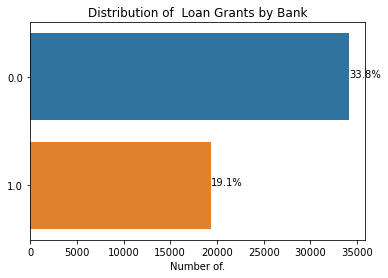

In [52]:
ax = sns.countplot(y=Y)
plt.title('Distribution of  Loan Grants by Bank')
plt.xlabel('Number of.')

total = len(final)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

<b> We found that out of the 51% people not granted loan by the bank 19.2% wouldd have actually reapid loan. </b>

# Our Model Profitability and Comparision

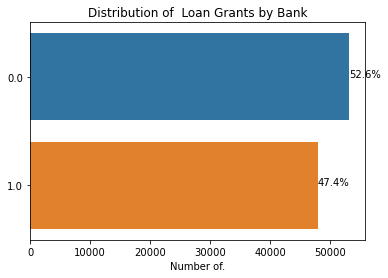

In [53]:
final_transformed = col_trans.fit_transform(final)

X= final_transformed
Y= gbr.predict(X)
ax = sns.countplot(y=Y)
plt.title('Distribution of  Loan Grants by Bank')
plt.xlabel('Number of.')

total = len(final)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

<b>Loan Granted to 47.7% of total applicants </b>

In [54]:
len(final)*.477

48224.7

<b> The accuracy of the model is ROC Accuracy = 92.5%. So Multiplying the above granted number by accuracy will give the defaulters rate </b>

In [55]:
48224*.075

3616.7999999999997

In [56]:
profit=(48224-3617)
profit

44607

<b> Company made a profit of 44,607 </b>

<b> Comparing with bank models profit </b>

In [57]:
((profit-13758)/13758)*100

224.22590492804187

# Our Model made 224% increase in the profit 